# DATA CLEANING

## Data loading through the read_csv function

The code below presents the titanic passenger dataset, load the data, perform some preliminary analysis and clean the columns with missing data. Dummies" variables will be added to the dataset representing categorical data.

In [1]:
import pandas as pd
import os
import numpy as np
import random

mainpath = "/Users/andrescarvajal/Desktop/Portfolio/dataCleaning/"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filename)

data = pd.read_csv(fullpath)

data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
data.tail(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
data.shape

(1309, 14)

In [4]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Missing values

In [7]:
pd.isnull(data["body"])

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

In [8]:
pd.notnull(data["body"])

0       False
1       False
2       False
3        True
4       False
        ...  
1304     True
1305    False
1306     True
1307    False
1308    False
Name: body, Length: 1309, dtype: bool

In [9]:
pd.isnull(data["body"]).values.ravel().sum()

1188

In [10]:
pd.notnull(data["body"]).values.ravel().sum()

121

### Missing values in a data set can occur for two reasons:

* Data extraction
* Data collection

### Deleting missing values

In [11]:
data.dropna(axis=0, how="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
data2 = data

In [13]:
data2.dropna(axis=0, how="any")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


### Calculation of missing values

In [15]:
data3 = data

In [16]:
data3["body"] = data3["body"].fillna(0) #Change the NaN values to 0
data3["home.dest"] = data3["home.dest"].fillna("Unknown") #Change the NaN values to "Unknown"
data3.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


In [17]:
pd.isnull(data3["age"]).values.ravel().sum()

263

In [18]:
data3["age"].fillna(data["age"].mean())

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [19]:
data3["age"].fillna(method="ffill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [20]:
data3["age"].fillna(method="backfill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [21]:
data3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Unknown
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Unknown
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Unknown
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,0.0,Unknown


### Dummy variables

In [22]:
data["sex"].head(10)

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [23]:
dummy_sex = pd.get_dummies(data["sex"], prefix="sex")

In [24]:
dummy_sex.head(10)

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [25]:
column_name=data.columns.values.tolist()
column_name

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [26]:
data = data.drop(["sex"], axis = 1)

In [27]:
data = pd.concat([data, dummy_sex], axis = 1)

In [28]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [29]:
createDummies(data3, "sex")

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Unknown,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Unknown,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Unknown,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,0.0,Unknown,0,1


## Data Visualization

The following code uses telephone customer churn data, it shows the visualization of the data by plotting columns of the data set in function of other columns and also in relation to their frequency. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", sep=",")
data3 = data2

In [31]:
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [32]:
data2.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

In [33]:
data_cols = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Columns.csv")
data_col_list = data_cols["Column_Names"].tolist()
data2 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", header = None, names = data_col_list)
data2.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'], dtype=object)

In [34]:
%matplotlib inline 

### Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

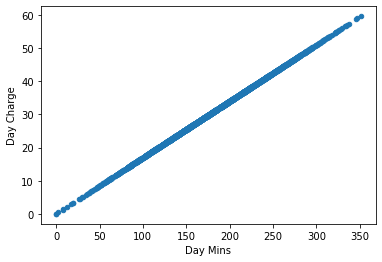

In [35]:
data3.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

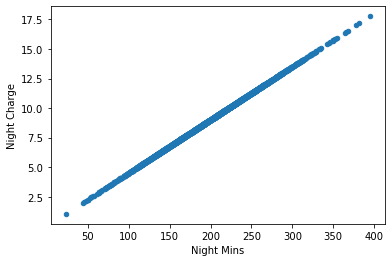

In [36]:
data3.plot(kind="scatter", x="Night Mins", y="Night Charge")

In [ ]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data3.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0])
data3.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data3.plot(kind="scatter", x="Day Calls", y ="Day Charge", ax=axs[1][0])
data3.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Frequency histogram

Text(0.5, 1.0, 'Histogram of the number of calls per day')

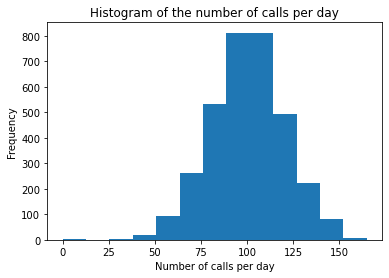

In [38]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(data3["Day Calls"], bins = k) #bins = [0,30,60,...,200]
plt.xlabel("Number of calls per day")
plt.ylabel("Frequency")
plt.title("Histogram of the number of calls per day")

### Boxplot

Text(0.5, 1.0, 'Boxplot of daily calls')

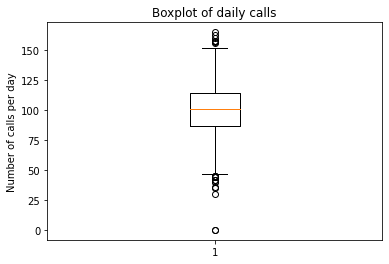

In [39]:
plt.boxplot(data3["Day Calls"])
plt.ylabel("Number of calls per day")
plt.title("Boxplot of daily calls")

In [40]:
data3["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [41]:
IQR=data3["Day Calls"].quantile(0.75)-data3["Day Calls"].quantile(0.25)
IQR

27.0

In [42]:
data3["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [43]:
data3["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

## Data loading through the open function

In [44]:
data3 = open(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt",'r')

In [45]:
cols = data3.readline().strip().split(",")
n_cols = len(cols)

In [46]:
counter = 0
main_dict = {}
for col in cols:
    main_dict[col] = []

In [47]:
for line in data3:
    values = line.strip().split(",")
    for i in range(len(cols)):
        main_dict[cols[i]].append(values[i])
    counter += 1

print("El data set tiene %d filas y %d columnas"%(counter-1, n_cols))

El data set tiene 3332 filas y 21 columnas


In [48]:
df3 = pd.DataFrame(main_dict)
df3.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


# Data Wrangling
## Create a subset of data
### Subset of column or columns

In [49]:
df4 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", sep=",")
df4

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [50]:
account_length = df4["Account Length"]

In [51]:
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [52]:
type(account_length)

pandas.core.series.Series

In [53]:
subset = df4[["Account Length", "Phone", "Eve Charge", "Day Calls"]]

In [54]:
type(subset)

pandas.core.frame.DataFrame

In [55]:
desired_columns = ["Account Length", "Phone", "Eve Charge", "Night Calls"]
subset = df4[desired_columns]
subset.head()

,Account Length,Phone,Eve Charge,Night Calls
0,128,382-4657,16.78,91
1,107,371-7191,16.62,103
2,137,358-1921,10.30,104
3,84,375-9999,5.26,89
4,75,330-6626,12.61,121


In [56]:
desired_columns = ["Account Length", "VMail Message", "Day Calls"]
desired_columns

['Account Length', 'VMail Message', 'Day Calls']

In [57]:
all_columns_list = df4.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [61]:
np.random.choice(all_columns_list) #Choose column value randomly 

'Phone'

In [59]:
sublist = [x for x in all_columns_list if x not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [60]:
subset = df4[sublist]
subset.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Subset of rows

In [62]:
df3[1:25]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.
5,AL,118,510,391-8027,yes,no,0,223.400000,98,37.980000,...,101,18.750000,203.900000,118,9.180000,6.300000,6,1.700000,0,False.
6,MA,121,510,355-9993,no,yes,24,218.200000,88,37.090000,...,108,29.620000,212.600000,118,9.570000,7.500000,7,2.030000,3,False.
7,MO,147,415,329-9001,yes,no,0,157.000000,79,26.690000,...,94,8.760000,211.800000,96,9.530000,7.100000,6,1.920000,0,False.
8,LA,117,408,335-4719,no,no,0,184.500000,97,31.370000,...,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.600000,84,43.960000,...,111,18.870000,326.400000,97,14.690000,11.200000,5,3.020000,0,False.
10,IN,65,415,329-6603,no,no,0,129.100000,137,21.950000,...,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True.


### Subsets of rows with Boolean conditions

In [63]:
##Users with Day Mins > 300
data1 = df4[df4["Day Mins"]>300]
data1.shape

(43, 21)

In [64]:
##New York Users (State = "NY")
data2 = df4[df4["State"]=="NY"]
data2.shape

(83, 21)

In [65]:
##AND -> &
data3 = df4[(df4["Day Mins"]>300) & (df4["State"]=="NY")]
data3.shape

(2, 21)

In [66]:
##OR -> |
data4 = df4[(df4["Day Mins"]>300) | (df4["State"]=="NY")]
data4.shape

(124, 21)

In [67]:
data5 = df4[df4["Day Calls"]<df4["Night Calls"]]
data5.shape

(1626, 21)

In [68]:
data6 = df4[df4["Day Mins"]<df4["Night Mins"]]
data6.shape

(2051, 21)

In [69]:
##Minutes of day, minutes of night and Count Length of the first 50 individuals
subset_first_50 = df4[["Day Mins", "Night Mins", "Account Length"]][:50]
subset_first_50.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


In [70]:
subset[:10]

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,510,391-8027,yes,no,223.4,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,510,355-9993,no,yes,218.2,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,415,329-9001,yes,no,157.0,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,408,335-4719,no,no,184.5,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,415,330-8173,yes,yes,258.6,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


### Filtering with loc and iloc

In [71]:
df4.iloc[:,3:6] ##All rows for columns between 3 and 6
df4.iloc[1:10,:] ##All columns for rows 1 to 10

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [73]:
df4.loc[[1,5,8,36], ["Area Code", "VMail Plan", "Day Mins"]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


### Insert new rows into the dataframe

In [74]:
df4["Total Mins"] = df4["Day Mins"] + df4["Night Mins"] + df4["Eve Mins"]

In [75]:
df4["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [76]:
df4["Total Calls"] = df4["Day Calls"] + df4["Night Calls"] + df4["Eve Calls"]

In [77]:
df4["Total Calls"].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

In [78]:
data.shape

(1309, 15)

In [79]:
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


# Reading and writing files

The following code reads a .dbf file with data corresponding to the geology of an area of Bolivia, cleans the data, checking the data types NaN and 0.00000, then writes them to a new .csv file. 

In [80]:
from dbfread import DBF


table = DBF(mainpath + '/' + '/Bolivia/Puntos.dbf', load=True)
frame = pd.DataFrame(iter(table))

#Checking type of missing values for x column
x = [x for x in frame.iloc[:]['X'] if np.isnan(x)]
print(np.isnan(x).any())

#Checking type of missing values for y column
y = [x for x in frame.iloc[:]['Y'] if np.isnan(x)]
print(np.isnan(x).any())

True
True


In [81]:
#writting new .csv file
outfile = open("Puntos_modificado.csv", "w")
# output the header row
outfile.write('OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia')
outfile.write('\n')
# output each of the rows:
row_string = str()
for i in range(len(frame)):
    if frame.iloc[i]['X'] == 0 and frame.iloc[i]['Y'] == 0 or np.isnan(frame.iloc[i]['X']) or np.isnan(frame.iloc[i]['Y']):
        continue
    else:
        row_string = '{},{},{},{},{},{}'.format(frame.iloc[i]['OBJECTID'],frame.iloc[i]['X'],frame.iloc[i]['Y'],frame.iloc[i]['Profondeur'],frame.iloc[i]['Z_Tertiary'],frame.iloc[i]['ProfTertia'])
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()

#print dataframe
frame

,OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia
0,1,562298.2627,8.208205e+06,160,0.0,160.0
1,2,561682.8387,8.206737e+06,160,0.0,160.0
2,3,563387.0899,8.207211e+06,160,0.0,160.0
3,4,561919.5402,8.205601e+06,160,0.0,160.0
4,5,562156.2418,8.204560e+06,160,0.0,160.0
...,...,...,...,...,...,...
46544,49802,0.0000,0.000000e+00,0,0.0,45.0
46545,49803,0.0000,0.000000e+00,0,0.0,45.0
46546,49804,0.0000,0.000000e+00,0,0.0,45.0
46547,49805,0.0000,0.000000e+00,0,0.0,45.0


In [82]:
#printing filtered csv
csv_file = pd.read_csv('Puntos_modificado.csv')
csv_file

,OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia
0,1.0,562298.2627,8.208205e+06,160.0,0.0,160.0
1,2.0,561682.8387,8.206737e+06,160.0,0.0,160.0
2,3.0,563387.0899,8.207211e+06,160.0,0.0,160.0
3,4.0,561919.5402,8.205601e+06,160.0,0.0,160.0
4,5.0,562156.2418,8.204560e+06,160.0,0.0,160.0
...,...,...,...,...,...,...
46517,49781.0,544910.3219,8.174247e+06,0.0,0.0,50.0
46518,49782.0,545062.7222,8.174343e+06,0.0,0.0,75.0
46519,49783.0,545202.4225,8.174438e+06,0.0,0.0,100.0
46520,49784.0,545323.0728,8.174501e+06,0.0,0.0,125.0


# Read data from a URL

In [85]:
medals_url = "http://winterolympicsmedals.com/medals.csv"

In [86]:
medals_data = pd.read_csv(medals_url)

In [87]:
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


# Downloading data with urllib3

Let's make an example using the urllib3 library to read the data from an external URL, process it and convert it to a python data frame before saving it to a local CSV.

In [90]:
def downloadFromURL(url, filename, sep = ",", delim = "\n", encoding="utf-8", 
                   mainpath = "Users/andrescarvajal/Desktop/Portfolio/dataCleaning/"):
    #import the library and make the connection to the data web site.
    import urllib3
    http = urllib3.PoolManager()
    r = http.request('GET', url)
    print("The status of the response is %d" %(r.status))
    response = r.data 
    
    #The reponse object contains a binary string, so we convert it to a string by decoding it to UTF-8.
    str_data = response.decode(encoding)

    #split the string into an array of rows, separating it by intros
    lines = str_data.split(delim)

    #The first line contains the header, so we extract it
    col_names = lines[0].split(sep)
    n_cols = len(col_names)

    #generate an empty dictionary where the information processed from the external URL will be stored.
    counter = 0
    main_dict = {}
    for col in col_names:
        main_dict[col] = []

    #process row by row the information to fill the dictionary with the data as we did before.
    for line in lines:
        #skip the first line, which contains the header, and we have already processed
        if(counter > 0):
            #divide each string by the commas as separator element
            values = line.strip().split(sep)
            #add each value to its respective dictionary column
            for i in range(len(col_names)):
                main_dict[col_names[i]].append(values[i])
        counter += 1

    print("The data set has %d rows y %d columns"%(counter-1, n_cols))

    #convert the processed dictionary to Data Frame and check that the data is correct.
    df = pd.DataFrame(main_dict)    
    return df

In [91]:
medals_df = downloadFromURL(medals_url, "athletes/downloaded_medals")
medals_df.head()

The status of the response is 200
The data set has 2311 rows y 8 columns


,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
